# Project 1
## IVP 21-22
### Giuseppe Lorenzo Pompigna
#### i6233748

In [1]:
# libraries
from math import floor, sin
import random

import cv2
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
figure_size = (18,7)
# functions to load/convert/display images, used throughout the whole assignment
def image(keyword, code=None):
    # read image by file
    # if code is 0 it reads the image with grayscale
    i =  cv2.imread('images/'+keyword+'.jpg', code)
    if i is None:
        return cv2.imread('images/'+keyword+'.jpeg', code)
    return i
def rgb(bgr):
    # convert bgr image to rgb
    return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

def show_image(title, desc, orig, img, gray=None):
    # helper function to show 2 images, usually the original one and a modified version of it
    # subplot [1,2]
    plt.figure(figsize=figure_size)
    plt.subplot(121), plt.title(title + ' '+ 'original'), plt.axis('off'), plt.imshow(orig,gray)
    plt.subplot(122), plt.title(title + ' '+ desc), plt.axis('off'), plt.imshow(img,gray)
    plt.show()
def show_images(title, desc1, desc2, orig, img1, img2,gray=None):
    # helper function to show 3 images, usually the original one and 2 modified versions of it
    # subplot [1,3]
    plt.figure(figsize=figure_size)
    plt.subplot(131), plt.title(title + ' '+ 'original'), plt.axis('off'), plt.imshow(orig)
    plt.subplot(132), plt.title(title + ' '+ desc1), plt.axis('off'), plt.imshow(img1,gray)
    plt.subplot(133), plt.title(title + ' '+ desc2), plt.axis('off'), plt.imshow(img2,gray)
    plt.show()
def show_image_hsv(title, desc1,desc2,desc3, orig, h, s, v):
    # this function displays the original image on the left and 3 following gray images
    # in a subplot [1,4]
    # used only in 1.1
    plt.figure(figsize=figure_size)
    plt.subplot(141), plt.title(title + ' '+ 'original'), plt.axis('off'), plt.imshow(orig)
    plt.subplot(142), plt.title(title + ' '+ desc1), plt.axis('off'), plt.imshow(h, cmap='gray')
    plt.subplot(143), plt.title(title + ' '+ desc2), plt.axis('off'), plt.imshow(s, cmap='gray')
    plt.subplot(144), plt.title(title + ' '+ desc3), plt.axis('off'), plt.imshow(v, cmap='gray')
    plt.show()

def plot_hist(i1,i2,l1,l2):
    # helper function to show 2 histograms about original pictures
    # subplot [1,2]
    plt.subplot(121), plt.title(l1), plt.hist(i1.ravel(),256,[0,256])
    plt.subplot(122), plt.title(l2), plt.hist(i2.ravel(),256,[0,256])
    plt.tight_layout()
    plt.show()
def plot_hist_2(i1,i2,l1,l2,n1,n2):
    # helper function to show 4 histograms, 2 about original pictures and 2 of the negated versions of them
    # subplot [2,2]
    plt.subplot(221), plt.title(l1), plt.hist(i1.ravel(),256,[0,256])
    plt.subplot(222), plt.title(l2), plt.hist(i2.ravel(),256,[0,256])
    plt.subplot(223), plt.title('neg. '+l1), plt.hist(n1.ravel(),256,[0,256])
    plt.subplot(224), plt.title('neg. '+l2), plt.hist(n2.ravel(),256,[0,256])
    plt.tight_layout()
    plt.show()
    pass

def plot_spectrum_2(orig,transl,m_s,m_s_t):
    # function to plot the power spectrum of the original image and the translated one
    # subplot [2,2]
    plt.subplot(221), plt.title('original'), plt.imshow(orig, cmap='gray')
    plt.subplot(222), plt.title('translated'), plt.imshow(transl,cmap='gray')
    plt.subplot(223), plt.title('fft original'), plt.imshow(m_s,cmap='Spectral')
    plt.subplot(224), plt.title('fft translated'), plt.imshow(m_s_t,cmap='Spectral')
    plt.tight_layout()
    plt.show()
    pass
def plot_image_spectrum(ps, img):
    # function to plot the power spectrum of the image in 1,2,3 dimensions
    # subplot [1,4]
    x,y = np.meshgrid(np.arange(ps.shape[0]), np.arange(ps.shape[1]))
    fig = plt.figure(figsize=figure_size, dpi=300)
    ax = fig.add_subplot(1,4,1); ax.set_title('image'); ax.imshow(img, cmap='gray')
    # 1D
    ax1 = fig.add_subplot(1,4,2); ax1.set_title('1D power spectrum'); ax1.plot(ps[int(img.shape[0]/2),:])
    # 2D
    ax2 = fig.add_subplot(1,4,3); ax2.set_title('2D power spectrum'); ax2.imshow(ps, cmap='Spectral')
    #3D
    ax3 = fig.add_subplot(1,4,4, projection='3d'); ax3.set_title('3D power spectrum')
    ax3.plot_surface(x,y,ps.T,cmap='Spectral')
    plt.tight_layout()
    plt.show()
    pass

## Task 1 Color Spaces
#### Transform from RGB to HSV
Choose two colorful images : one with bright colors and one with pale colors.

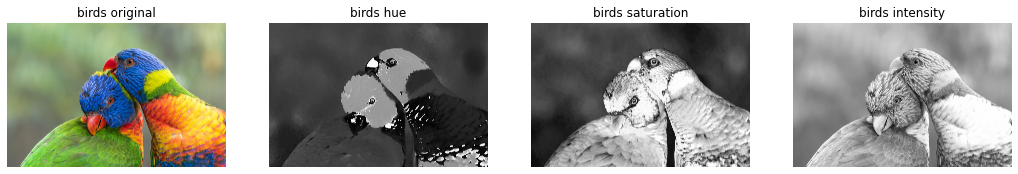

In [3]:
birds_bgr = image('birds') # load bgr image
birds_rgb = rgb(birds_bgr) # convert bgr to rgb
birds_hsv = cv2.cvtColor(birds_rgb, cv2.COLOR_RGB2HSV) # convert rgb to hsv
# display original image + (hue component) + (saturation component) + (value component)
show_image_hsv('birds','hue','saturation','intensity', birds_rgb, birds_hsv[:,:,0], birds_hsv[:,:,1], birds_hsv[:,:,2])

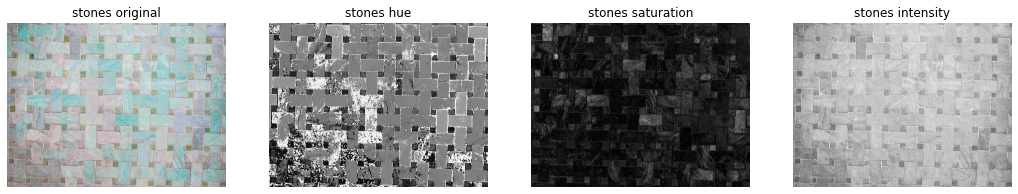

In [4]:
# same as above for the second image
stone_bgr = image('stone')
stone_rgb = rgb(stone_bgr)
stone_hsv = cv2.cvtColor(stone_rgb, cv2.COLOR_RGB2HSV)
show_image_hsv('stones','hue','saturation','intensity', stone_rgb, stone_hsv[:,:,0],stone_hsv[:,:,1],stone_hsv[:,:,2])

#### Transform your images from RGB to HSV and display your results
The images are converted from the RGB color space to the HSV color space with opencv builtin functions
The HSV color space defines a color in terms of its Red,Green,Blue components, converting them
into Hue,Saturation,Value components.
* Hue
    * Degree value to express the color in a radial spectrum.
    * Output range [0,360]
* Saturation
    * Describes how 'saturated' is an image in each color component space
    * Output range [0,100] (or [0,1] normalized)
* Value
    * Describes dominant color in terms of a averaged sum of the r,g,b components
    * Output range [0,255]


As we can see from the output images :
* the Hue component is primarly related to the conversion mode used, I might assume blue has a high conversion value and green a low one.
* the Saturation component indicates whether there are high values in the color components of the image, therefore we can see bright colors converts to higher values.
* the Value component is much more remarked in the bright spots therefore converts much better in contrasting colors spot. In the pale image, with flatten colors we can see the brightness value.

In [5]:
r1 = np.copy(birds_rgb[:, :, 0])
g1 = np.copy(birds_rgb[:, :, 1])
b1 = np.copy(birds_rgb[:, :, 2])
r2 = np.copy(stone_rgb[:, :, 0])
g2 = np.copy(stone_rgb[:, :, 1])
b2 = np.copy(stone_rgb[:, :, 2])

#### Transform from RGB to intensity I in HSI space
Without the usage of in-built function

In [6]:
def intensity_i(r,g,b):
    # function to return the intensity I value in the HSI color space
    # the output is pixel-wise the average sum of the r g b components
    # therefore the output is a single value normalized in range [0,255]
    return (r+g+b) / 3
def intensity_v(r,g,b):
    # function to return the value V brightness in the HSV color space
    # the output is pixel-wise the maximum of the r g b components
    # therefore the output is a single value in range [0,255]
    return np.maximum(r, np.maximum(g,b))

In [7]:
birds_I = intensity_i(r1,g1,b1)
stone_I = intensity_i(r2,g2,b2)

#### Transform from RGB to intensity V in HSV space
Without the usage of in-built function

In [8]:
birds_V = intensity_v(r1,g1,b1)
stone_V = intensity_v(r2,g2,b2)

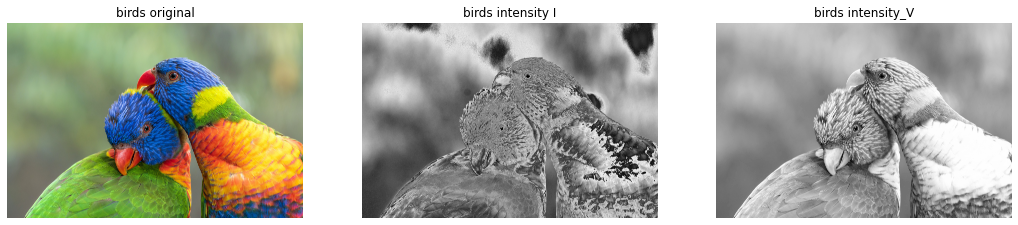

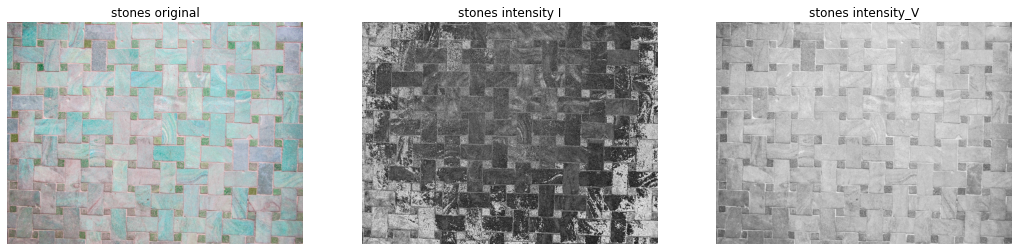

In [9]:
# display the results for both images
show_images('birds','intensity I','intensity_V',birds_rgb,birds_I,birds_V,'gray')
show_images('stones','intensity I','intensity_V',stone_rgb,stone_I,stone_V,'gray')

##### Comparing I and V value components
As we can see the manually computed V values show much lower results in the pale image rather than the bright image
while for the I values it is the way around.
As aforesaid the V value component is much more remarked in the bright spots and in presence of vivid colors
therefore gives brighter (higher value) output in the bright image.

## Task 2 Transforms, Equalization
Choose two grayscale images, one with high contrast and one with low contrast.

In [10]:
fog_rgb = rgb(image('fog'))
shadows_rgb = rgb(image('shadows'))

### histograms
Find the histograms of the two images and display them

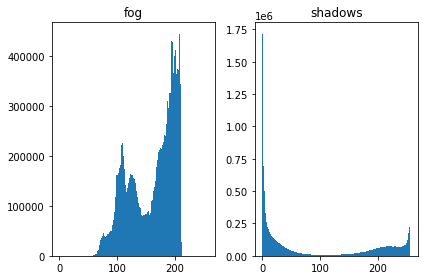

In [11]:
plot_hist(fog_rgb,shadows_rgb,'fog','shadows')

As we can see from the plots, the low contrast image on the left
has values which are more 'diffused' around the center,
meaning a high presence of different similar shades of gray.
In contrast, the high contrast picture histogram on the right, has
peaks on the extremes of the color range, meaning an high presence of
black and white colors.

### Negative transform
Transform your images with the Negative Pointwise transform
without usage of in-built functions

In [12]:
def negative(img):
    # helper function to get the negative of an image
    # the image is copied
    # then the output is the maximum pixel color value - the actual color of the pixel
    # this function is used for rgb image therefore the maximum value is 255
    # my trick is that python allows you to do this with this few code
    return 255 - np.copy(img)

In [13]:
n_fog = negative(fog_rgb);  n_shadows = negative(shadows_rgb)

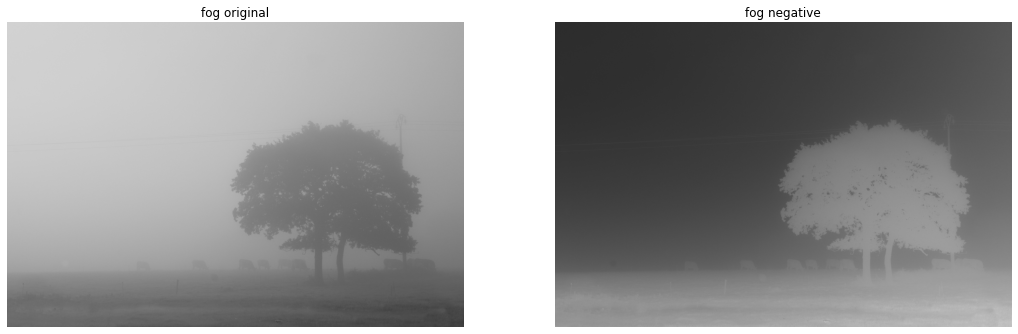

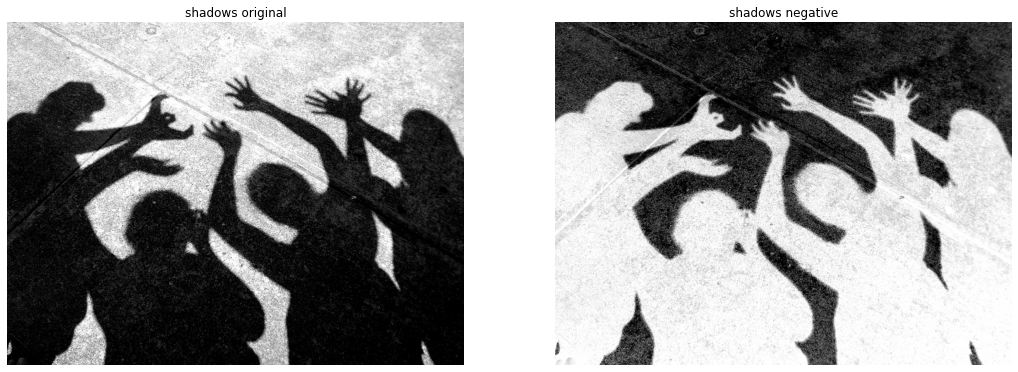

In [14]:
#display results
show_image('fog','negative',fog_rgb,n_fog)
show_image('shadows','negative',shadows_rgb,n_shadows)

As expected we can see the two images are the exact inverse of their original copies
The low contrast image keeps having low contrast and the background fogue became dark,
while the shadows of the people on the ground became super bright.

### Negative histograms
Find the histogram of the negative images and display them

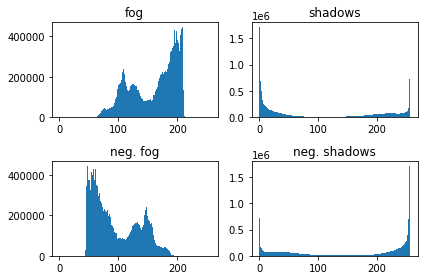

In [15]:
#display together in order to compare them
plot_hist_2(fog_rgb,shadows_rgb,'fog','shadows',n_fog,n_shadows)

It is clear that the histograms of the negative images are the
inverse symmetric copy of the original images histograms
They are flipped along the color range axis (black <-> white)
Indeed now the fog image has darker tone, indeed the distribution
of the gray tends to the left (low value=black)

### Power law transform
Create a power law pointwise transform that transforms pixel intensity values from
r to s using $s = r^{n}$
Use the resulting power law transform to convert the image to a higher or lower
contrast color range.

In [16]:
def power_law(img, n):
    # function to transform an image through a point wise power law
    # the pixel color values are normalized in [0,1] range and then
    # raised to the n power, given as parameter, then casted to int
    # this gives low values for 0 < n < 1
    # this gives high values for 1 < n
    # maximum output at this point can be 1     * ( 1^inf = 1 )
    # after the power is applied the value is multiplied back to 255
    return np.array(255 * (img / 255) ** n, dtype='uint8')

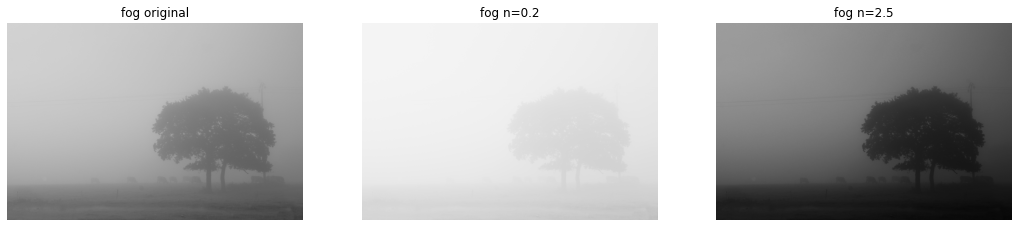

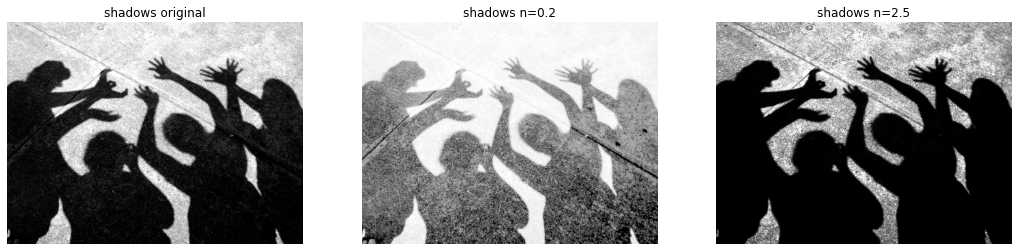

In [17]:
low = 0.2  # gives low contrast
high = 2.5 # gives high contrast
show_images('fog','n='+str(low),'n='+str(high),fog_rgb,power_law(fog_rgb,low), power_law(fog_rgb,high))
show_images('shadows','n='+str(low),'n='+str(high),shadows_rgb,power_law(shadows_rgb,low), power_law(shadows_rgb,high))

##### Explain how low and high contrast factor works
As we can see using low $n$ values we obtain lower contrast images.
This is clearly due to the fact that the pixel values are first normalized in
[0,1] range and then raised to the $n$ power, until they don't get again
mapped to [0,255] range.
It is intuitive to think that it has no point in getting the low contrast image
have an even lower contrast, we might therefore choose for it an high n value.
In contrast, for the initially high contrast image, we might prefer to choose a
low n value, to smooth a bit the image.
The values used are 0.2 for low contrast and 2.5 for high contrast.

## Task 3 Special Effects
Choose an image with strong circular features and straight features

In [18]:
flower = rgb(image('flower'))

### Polar coordinates
Convert your image to polar coordinates and display it

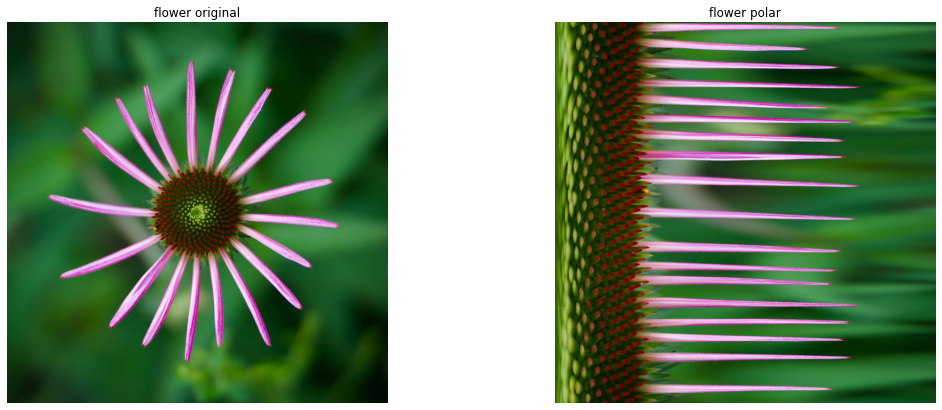

In [19]:
hf, wf, _ = flower.shape
polar_flower = cv2.linearPolar(flower, (wf/2, hf/2), min(wf,hf) /2,flags=cv2.WARP_FILL_OUTLIERS)
show_image('flower','polar',flower,polar_flower)

Polar coordinates are expressed in terms of magnitude and angle of the z value
in the Real,Imag space.
It is therefore intuitive to think that picture elements as the flower internal
circle, which have respectively the same magnitude value, then appear in the polar
plane all together aligned on the x-axis, distributed on the y-axis (due to their angle changing)
Flower leaves are then aligned with their angles and stretching away (magnitude increasing)

### Cartoonify
Cartoonify your image by creating a program which creates a black outline around the shapes
and fills in the colored area with uniform colors.

In [20]:
def edge_mask(img, line = 25, blur = 5):
    # function that first converts the image to gray ,
    # then blurres it applying a weighted median scale
    # and in the end returns a binary output filtering
    # values above or below a selected threshold or mean value
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(gray, blur)
    return cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line, blur)
def color_quantization(img, num_colors):
    # function that converts the image color range into a restricted one
    # returns the image with the colors clustered around the mean points
    # figuring below #k labels
    im_pil = Image.fromarray(np.uint8(img))
    im_pil = im_pil.quantize(num_colors)
    return np.array(im_pil.convert("RGB"))
def cartoonify(img,num_colors):
    # function to cartoonify an image by applying
    # an edge mask and color quantization
    colored = color_quantization(img,num_colors)
    edges = edge_mask(img)
    return cv2.bitwise_and(colored, colored, mask=edges)

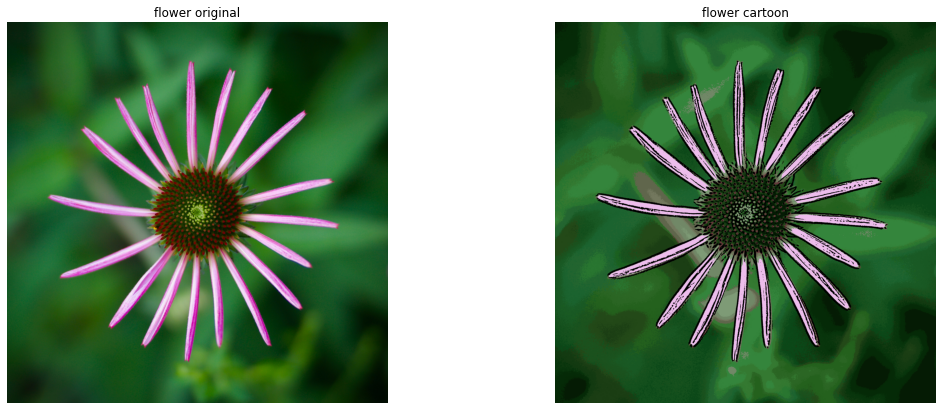

In [21]:
colors = 24 # set of available colors for quantization
show_image('flower','cartoon',flower,cartoonify(flower,colors))

To apply the edge mask the image is first converted to gray, then blurred
with a parameterized value and in the end filtered throughout a binary step,
returning whether the input values are above or below the median values.
To then fill in with uniform color I've chosen to apply color quantization to the
image using opencv function.
It can be personalised adding custom line width or blur level or color range size.

## Task 4 Frequency domain
Choose an image and apply a visible translation to it in the spatial domain.

In [22]:
def translate(img):
    # function which shifts the image on the x axis by 1/4 of its width
    height,width = img.shape
    # translation matrix
    tm = np.float32([
        [1,   0,  width/4],
        [0,   1,   0  ]
    ])
    return  cv2.warpAffine(img, tm, (width, height))
def mag_pow_spectrum(img):
    # function which evaluates and returns the shifted fourier transform of an image,
    # with its magnitude spectrum and its power spectrum
    fft = np.fft.fftshift(np.fft.fft2(np.copy(img)))
    m = 20 * np.log(np.abs(np.copy(fft)))
    p = np.copy(m) ** 2
    return fft,m,p

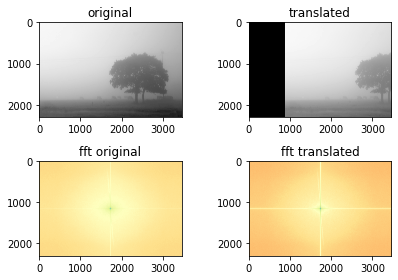

In [23]:
original = image('fog',code=0)
translated = translate(original)
_,magnitude_spectrum,_ = mag_pow_spectrum(original)
_,magnitude_spectrum_t,_ = mag_pow_spectrum(translated)

plot_spectrum_2(original,translated,magnitude_spectrum,magnitude_spectrum_t)

As we can see from the 2D FFT magnitude of the translated image, the output is quite different from the centered one,
we can perceive the vertical and the horizontal lines, which indicates presence of 0 values in the image (black)
These values are aligned along the axes of the FFT magnitude due to the shifting.
These indeed have high values when the conversion is performed, and indeed we can see
the black bar on the left generates a big white cross.

## Task 5 Periodic noise removal
Choose an image and add periodic noise to it

In [24]:
def noise(img, frequency):
    # function which alternates real values and black values
    # with the simmetry of the sinusoidal frequency given
    # if values are above the median point the image pixel value is taken,
    # else a 0 value is applied
    n = np.copy(img)
    m = np.mean(frequency)
    for i in range(img.shape[0]):
        if frequency[i] < m :
            for k in range(0,img.shape[1]):
                n[i,k] = 0
    return n

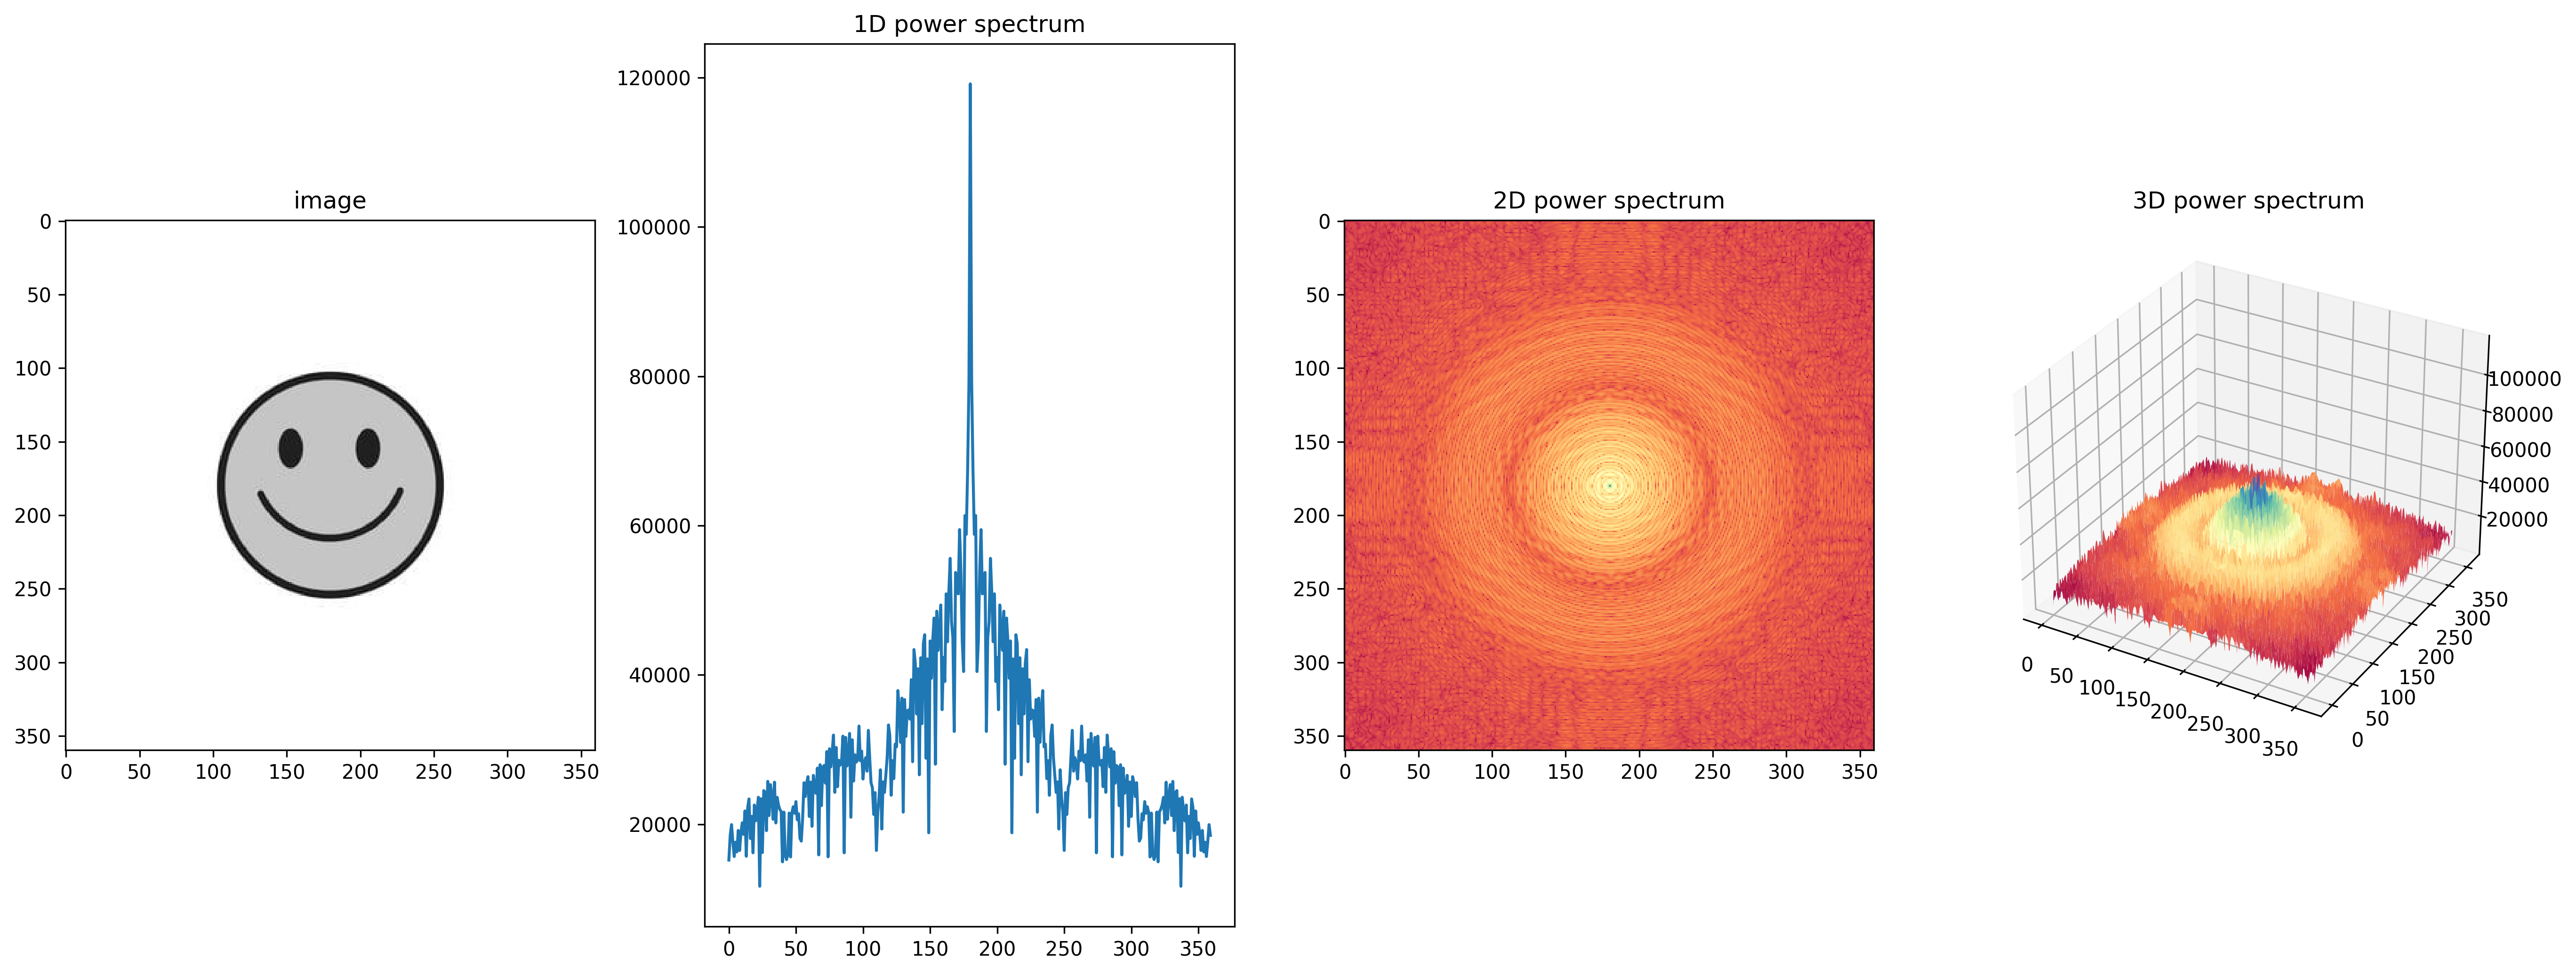

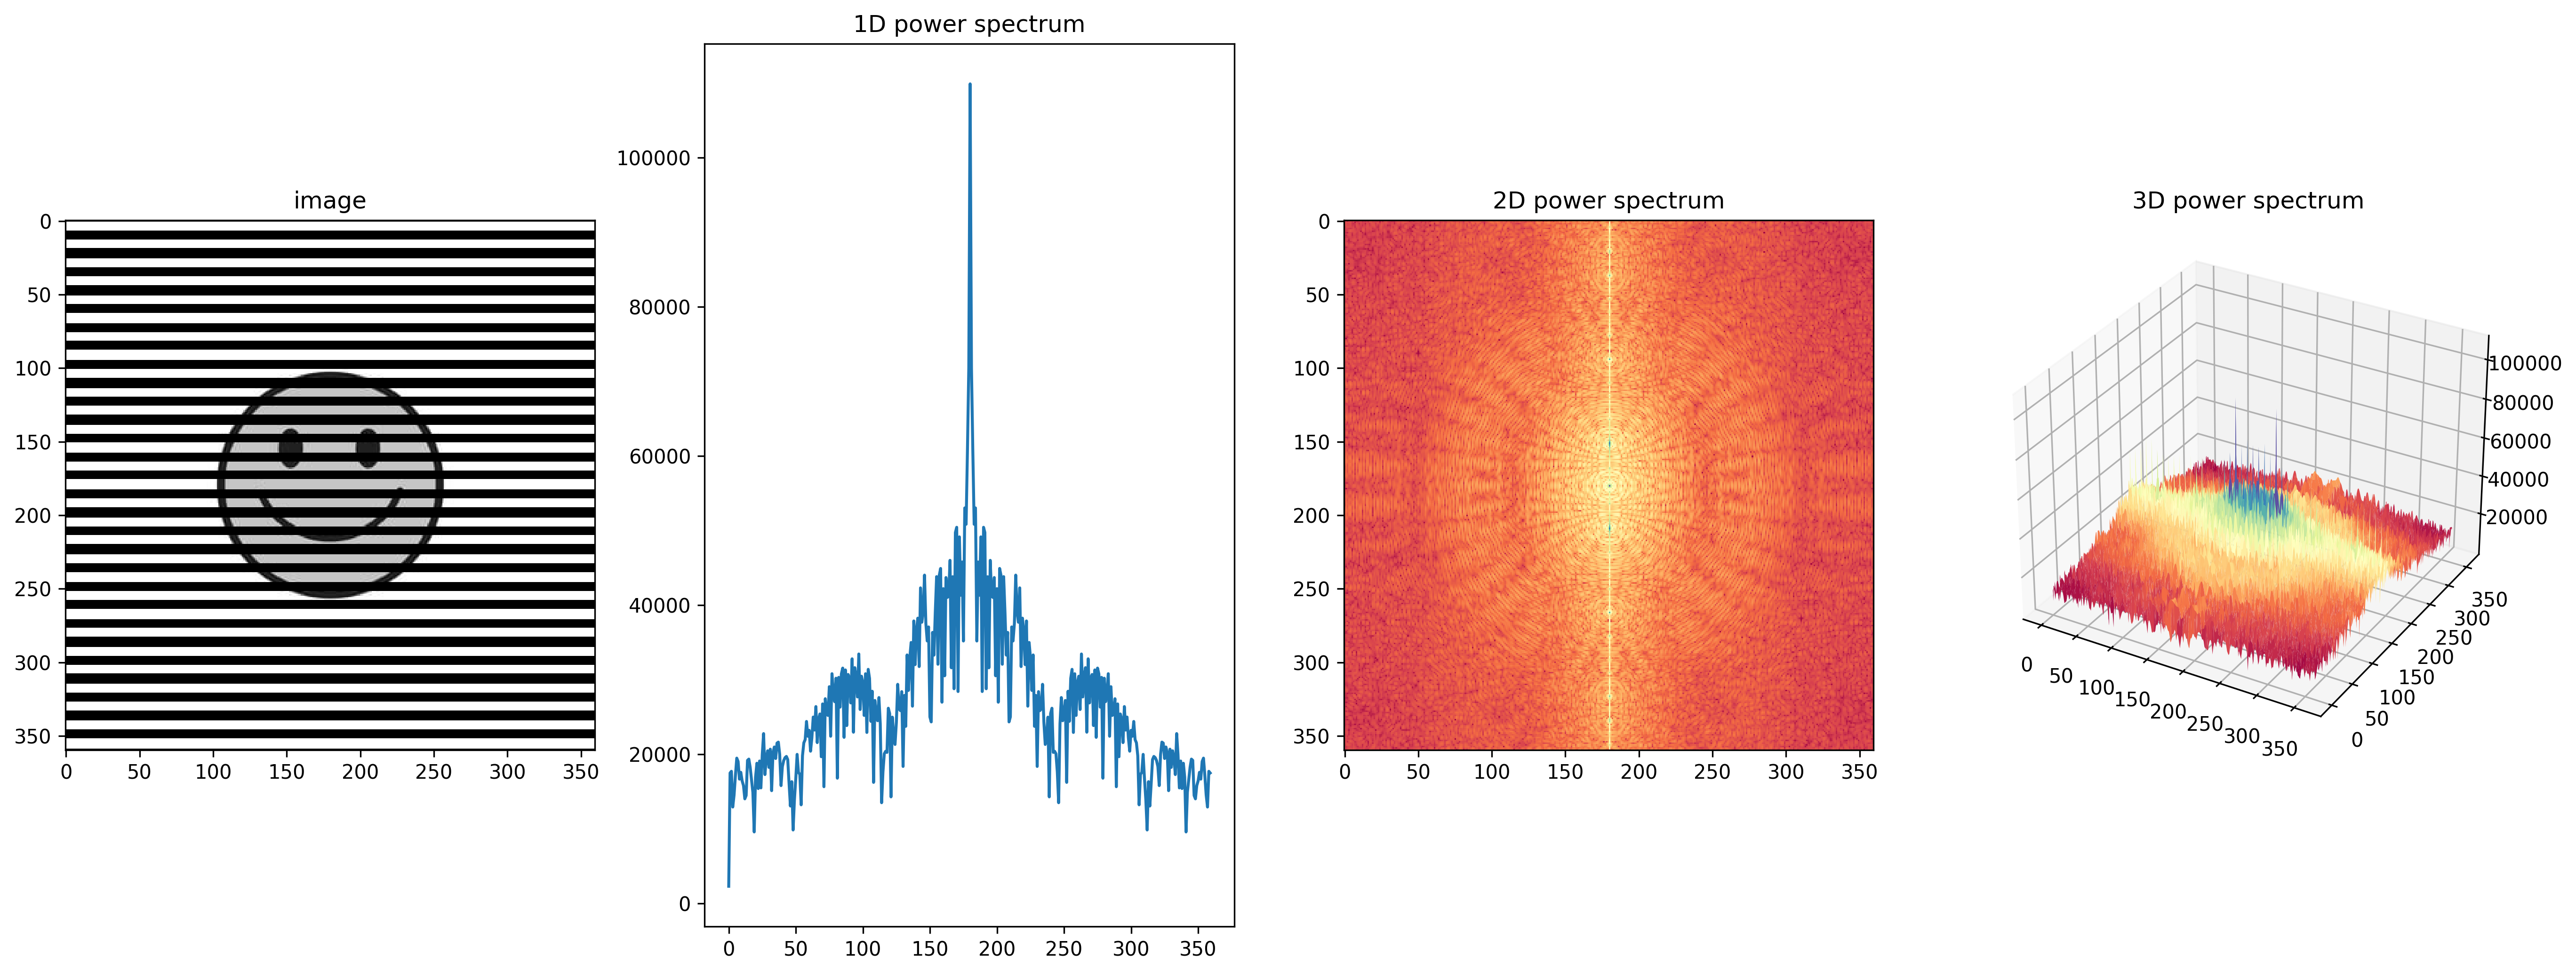

In [25]:
original = image('smile',code=0) # load gray image
# add sinusoidal y noise (horizontal bands)
x = list(range(0,original.shape[0])); y = [100 * sin(0.5 * i) for i in x]
perturbed = noise(original, y)
_,_,ps = mag_pow_spectrum(original)
_,_,noise_ps = mag_pow_spectrum(perturbed)
plot_image_spectrum(ps, original)
plot_image_spectrum(noise_ps, perturbed)

As we can see from the comparison between the original image spectrum and the perturbed one's
we can clearly notice the straight vertical line appearing (indicating the horizontal black bars in the image)
Also, the width of the 3D spectrum spike crest is increased, from being a circular peak (due to the round smile face) to a
more straight hill (due to the massive amount of horizontal lines)
We can also notice from the 2D spectrum that the rounding shapes are a bit distorted, from a concentric pattern to a
more disjoint shape.
This distortion is due to the rounding black/gray colored circular shapes being transformed to a sort of bending line/curve.

#### Remove noise
Find a way to remove the periodic noise in the frequency domain. Then show the de-noised image

In [26]:
def remove_noise(img):
    # function which converts the image in the frequency domain
    # with ft transform and phase shift
    # After it, by inspection, it can be seen what the interference
    # is, since the noise will give some relatable pattern in the freq. domain
    fft,ms,_ = mag_pow_spectrum(img)
    # get the center of the image
    w =fft.shape[0]; c1 = w // 2; c2 = fft.shape[1]//2; r =10
    fft_shift_corrected = np.copy(fft)
    # take corner value * 10 (should be approx. higher than the mean)
    n = fft_shift_corrected[0,0] * 10
    # create a box by distancing from the center by r
    # level down the value of the interference within this box with value n
    fft_shift_corrected[0:c1-r, c2-r:c2+r] = n
    fft_shift_corrected[c1+r:w, c2-r:c2+r] = n
    # return corrected spectrum magnitude
    ms_corrected = np.log(np.abs(fft_shift_corrected))
    ps_corrected = np.copy(ms_corrected)**2
    # apply inverse fft to get the restored image
    recovered = np.fft.ifft2(np.fft.ifftshift(fft_shift_corrected)).real
    return recovered,ms_corrected,ps_corrected

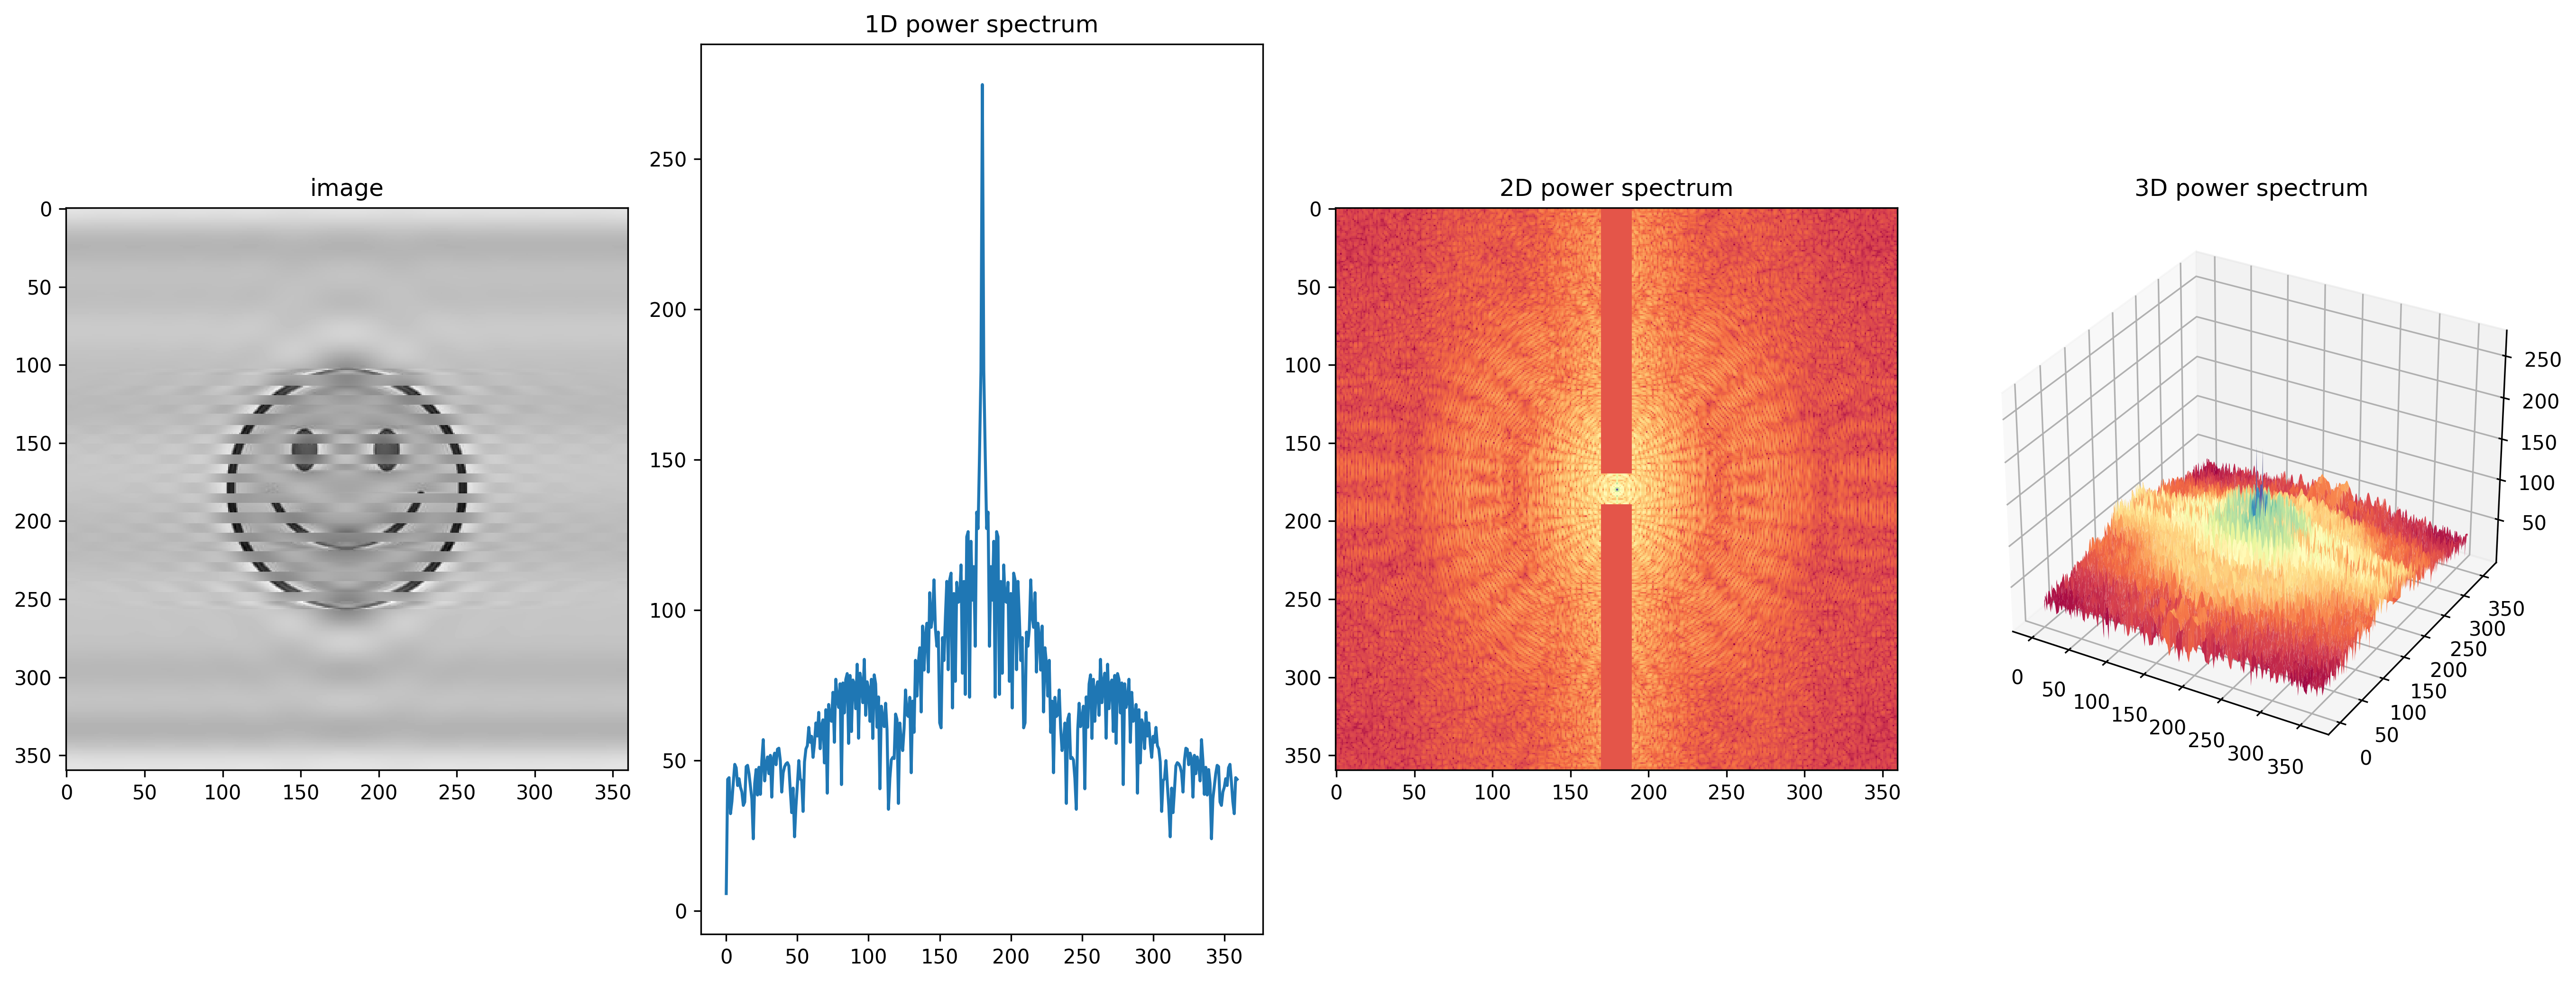

In [27]:
restored,ms,ps = remove_noise(perturbed)
plot_image_spectrum(ps, restored)

To apply noise removal I chose to first convert the image in the frequency domain, by fft transform
and phase shift.
After it by inspection I noticed the peaks were around the vertical central axis and
I created a boxed region around this section of the spectrum in order to make the vertical
interference pattern disappear.
I then applied this mask to the fft shift and I obtained something which looked much more
similar to the fft of the original image.
I carefully avoided removing the peak in the center because it was also present in the original
image, and indeed,filtering that out would cause undesired outputs.
After having applied this mask I have shown the corrected spectrum and from here we can see
it doesn't exactly look like the original image, but the vertical bar (not present in the original image spectrum)
has disappeared, at least.
It can indeed be seen from the restored image, that the recovering isn't perfect,
the distortion in the circular pattern creates an interference in the recovered image as well,
but the horizontal bars have almost disappeared, blending with the background.
The dark gray value may be caused by the arbitrary n value I chose to level down the frequency
peaks in the spectrum plot.